# EDA choosing variables to consider and which are redundant


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [44]:
df = pd.read_csv('/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/FINAL_MERGED.csv')
df_15 = pd.read_csv('/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/merged_per_year/merged_2013-14')

In [23]:
df.columns.tolist()

['Unnamed: 0',
 'Unnamed: 1',
 'PLAYER_ID',
 'PLAYER_NAME',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'AGE',
 'GP',
 'W',
 'L',
 'W_PCT',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'SEASON',
 'PCT_FGA_2PT',
 'PCT_FGA_3PT',
 'PCT_PTS_2PT',
 'PCT_PTS_2PT_MR',
 'PCT_PTS_3PT',
 'PCT_PTS_FB',
 'PCT_PTS_FT',
 'PCT_PTS_OFF_TOV',
 'PCT_PTS_PAINT',
 'PCT_AST_2PM',
 'PCT_UAST_2PM',
 'PCT_AST_3PM',
 'PCT_UAST_3PM',
 'PCT_AST_FGM',
 'PCT_UAST_FGM',
 'opp_lessthan5ft_FGM',
 'opp_lessthan5ft_FGA',
 'opp_lessthan5ft_FG_PCT',
 'opp_5_9ft_FGM',
 'opp_5_9ft_FGA',
 'opp_5_9ft_FG_PCT',
 'opp_10_14ft_FGM',
 'opp_10_14ft_FGA',
 'opp_10_14ft_FG_PCT',
 'opp_15_19ft_FGM',
 'opp_15_19ft_FGA',
 'opp_15_19ft_FG_PCT',
 'opp_20_24ft_FGM',
 'opp_20_24ft_FGA',
 'opp_20_24ft_FG_PCT',
 'opp_25_29ft_FGM',
 'opp_25_29ft_FGA',
 'opp_25_29ft_FG_PCT',
 'opp_30_34ft_FGM',
 'opp_3

In [35]:
# shooting range beyond 25 ft are taken care of by variables 3PM and 3PA.
drop_columns = ['Unnamed: 0', 'Unnamed: 1', '25_29ft_FGM', '25_29ft_FGA', '25_29ft_FG_PCT',
 '30_34ft_FGM', '30_34ft_FGA', '30_34ft_FG_PCT', '35_39ft_FGM', 'SEASON']

In [47]:
# I chose to keep opponent stats in ranges less than 10 ft. Injuries of ankles and knees typically occur
# closer to the basket where an offensive player drives to the basket, lands on the defenders foot or land
# awkwardly on the floor after being pushed or fouled. 
drop_opp_columns = ['opp_10_14ft_FGM',
 'opp_10_14ft_FGA',
 'opp_10_14ft_FG_PCT',
 'opp_15_19ft_FGM',
 'opp_15_19ft_FGA',
 'opp_15_19ft_FG_PCT',
 'opp_20_24ft_FGM',
 'opp_20_24ft_FGA',
 'opp_20_24ft_FG_PCT',
 'opp_25_29ft_FGM',
 'opp_25_29ft_FGA',
 'opp_25_29ft_FG_PCT',
 'opp_30_34ft_FGM',
 'opp_30_34ft_FGA',
 'opp_30_34ft_FG_PCT']
drop_columns += drop_opp_columns
columns = df.columns - drop_columns
numeric_col = columns - ['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION']
numeric_col

/Users/amos/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
/Users/amos/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:21: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


Index([u'10_14ft_FGA', u'10_14ft_FGM', u'10_14ft_FG_PCT', u'15_19ft_FGA',
       u'15_19ft_FGM', u'15_19ft_FG_PCT', u'20_24ft_FGA', u'20_24ft_FGM',
       u'20_24ft_FG_PCT', u'3GMS_IN_4DAYS', u'4GMS_IN_5DAYS', u'5_9ft_FGA',
       u'5_9ft_FGM', u'5_9ft_FG_PCT', u'AGE', u'AST', u'B2B_COUNT', u'BLK',
       u'BLKA', u'DREB', u'FG3A', u'FG3M', u'FG3_PCT', u'FGA', u'FGM',
       u'FG_PCT', u'FTA', u'FTM', u'FT_PCT', u'GP', u'L', u'MIN',
       u'NET_RATING', u'OREB', u'PACE', u'PCT_AST_2PM', u'PCT_AST_3PM',
       u'PCT_AST_FGM', u'PCT_FGA_2PT', u'PCT_FGA_3PT', u'PCT_PTS_2PT',
       u'PCT_PTS_2PT_MR', u'PCT_PTS_3PT', u'PCT_PTS_FB', u'PCT_PTS_FT',
       u'PCT_PTS_OFF_TOV', u'PCT_PTS_PAINT', u'PCT_UAST_2PM', u'PCT_UAST_3PM',
       u'PCT_UAST_FGM', u'PF', u'PFD', u'PIE', u'PLAYER_HEIGHT_INCHES',
       u'PLAYER_WEIGHT', u'PLUS_MINUS', u'PTS', u'REB', u'STL', u'TOV',
       u'TS_PCT', u'USG_PCT', u'W', u'W_PCT', u'lessthan5ft_FGA',
       u'lessthan5ft_FGM', u'lessthan5ft_FG_PCT', u'opp_5_9

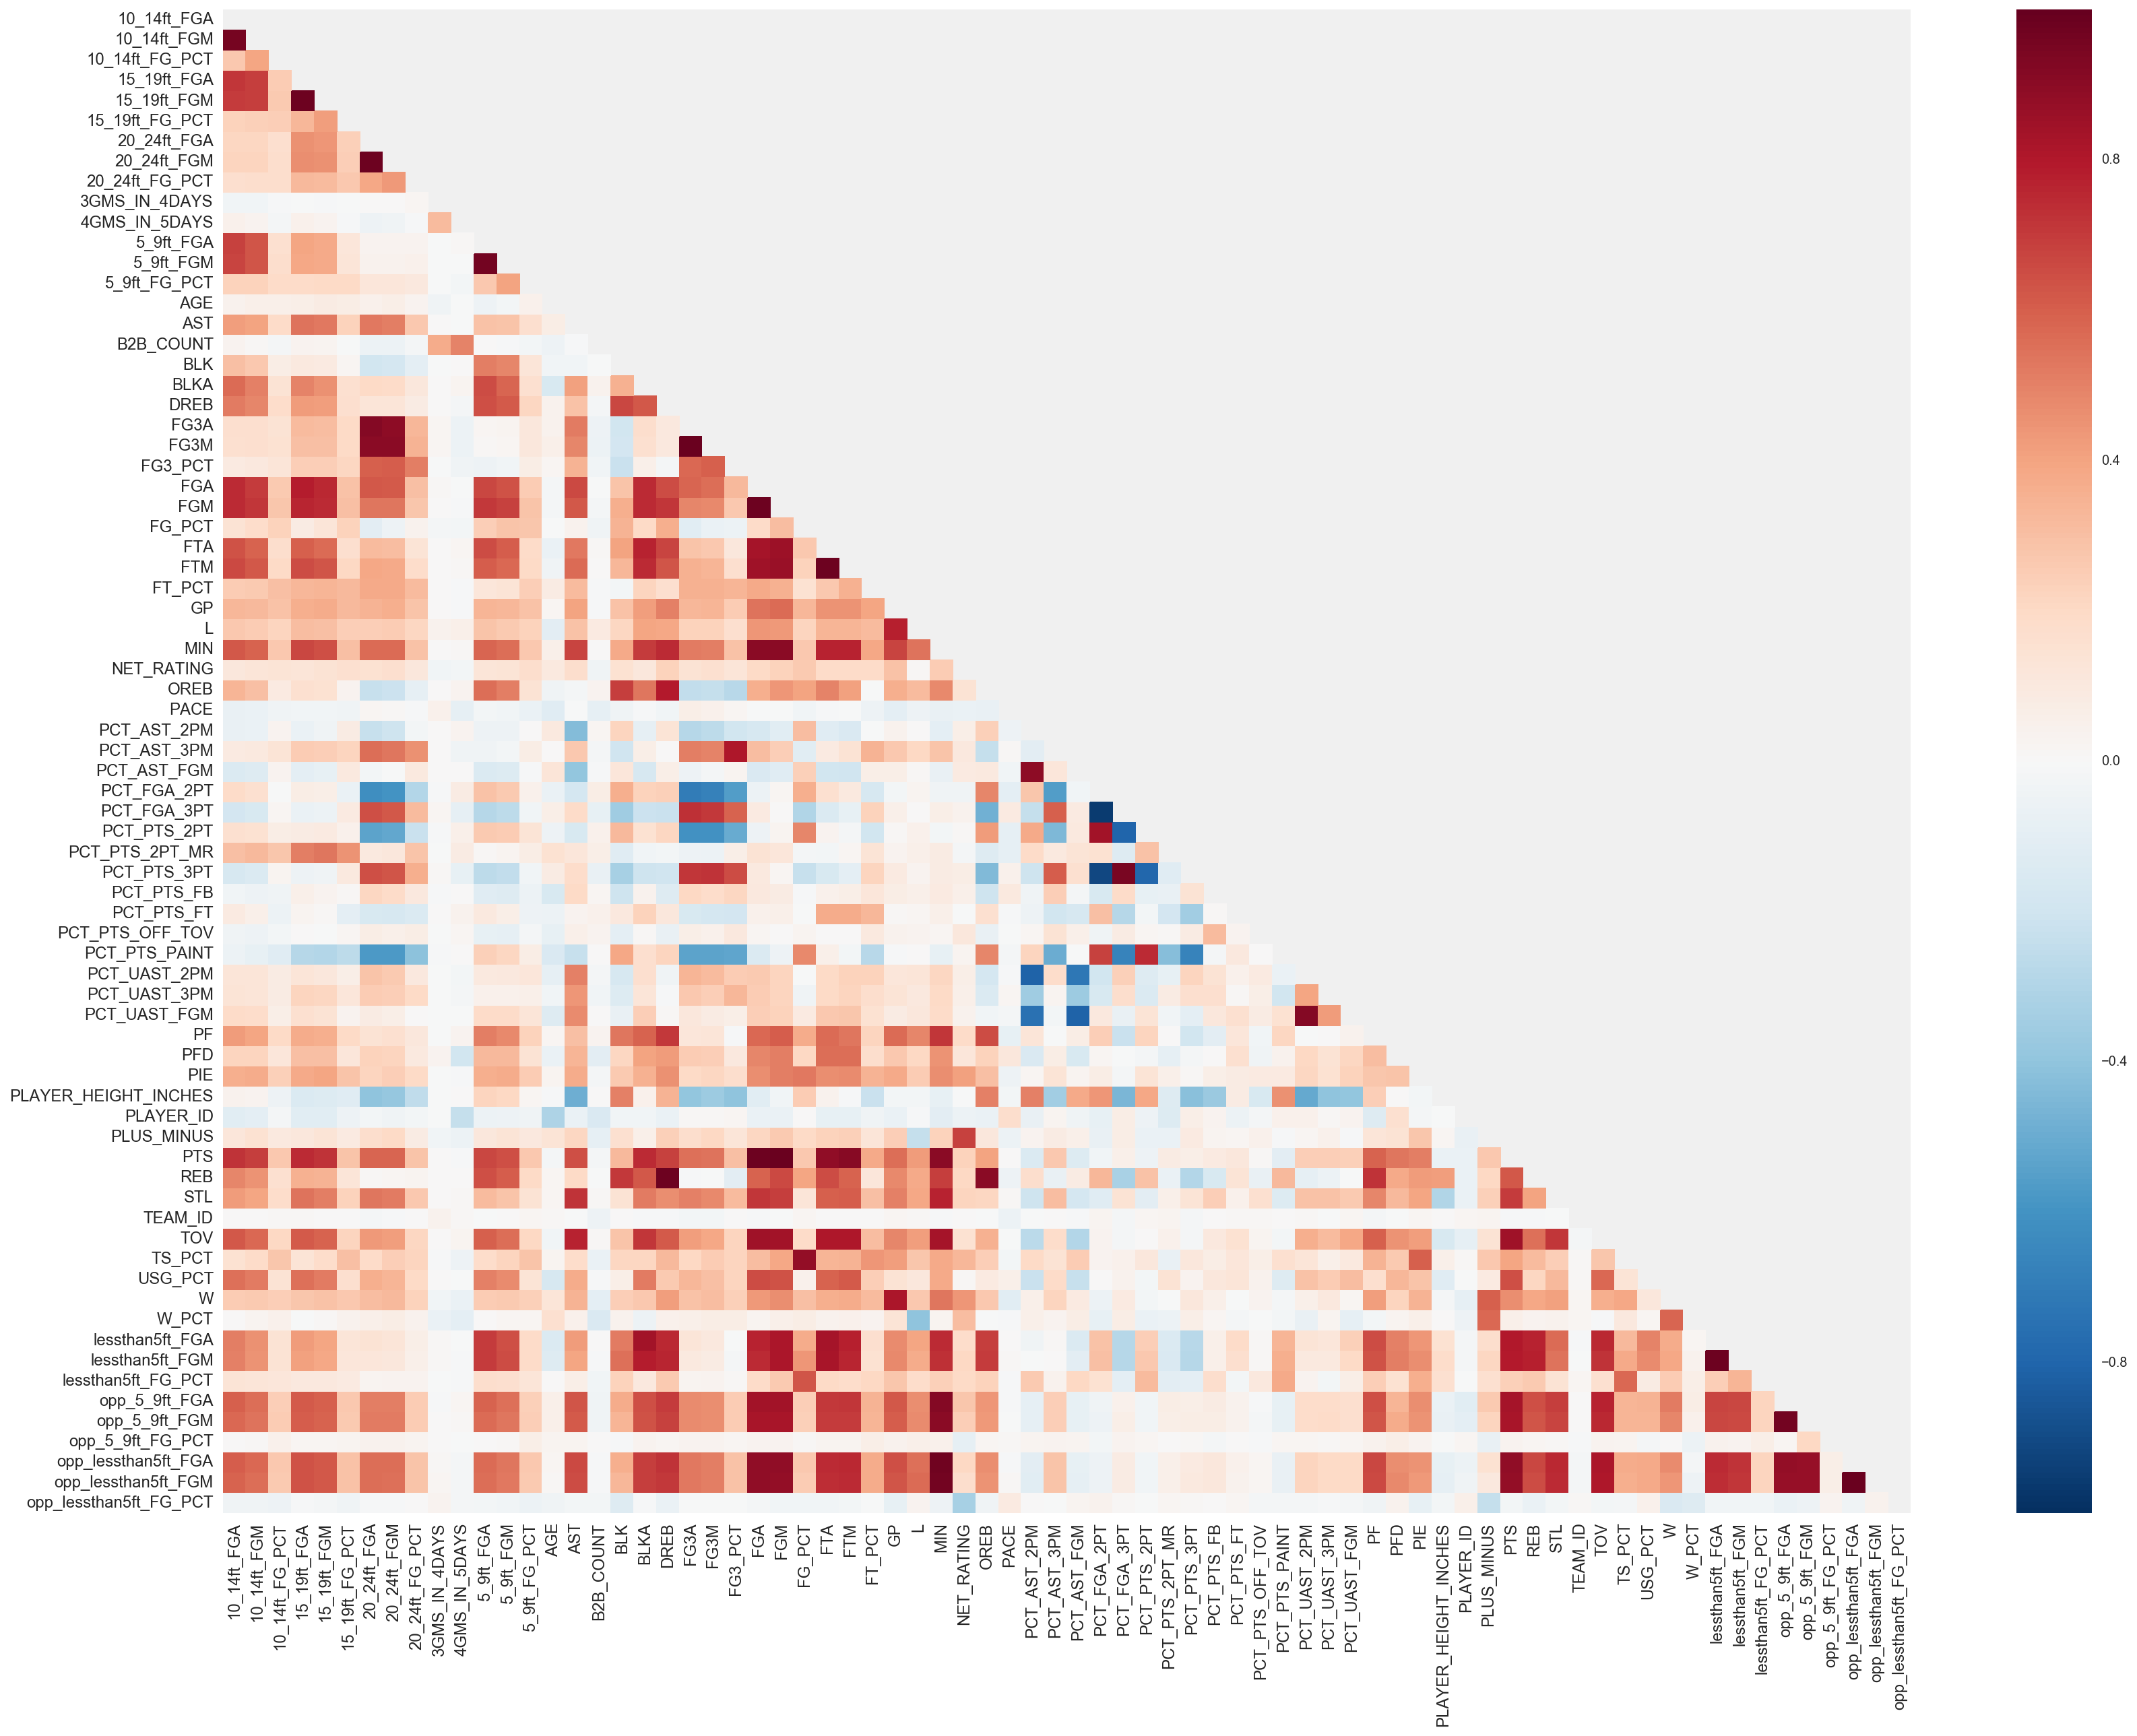

In [37]:
df_fg = df[columns]
all_corr = df_fg.corr()

# Set the default matplotlib figure size to 7x7:
plt.rcParams['figure.figsize']=(25,20)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(all_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(all_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

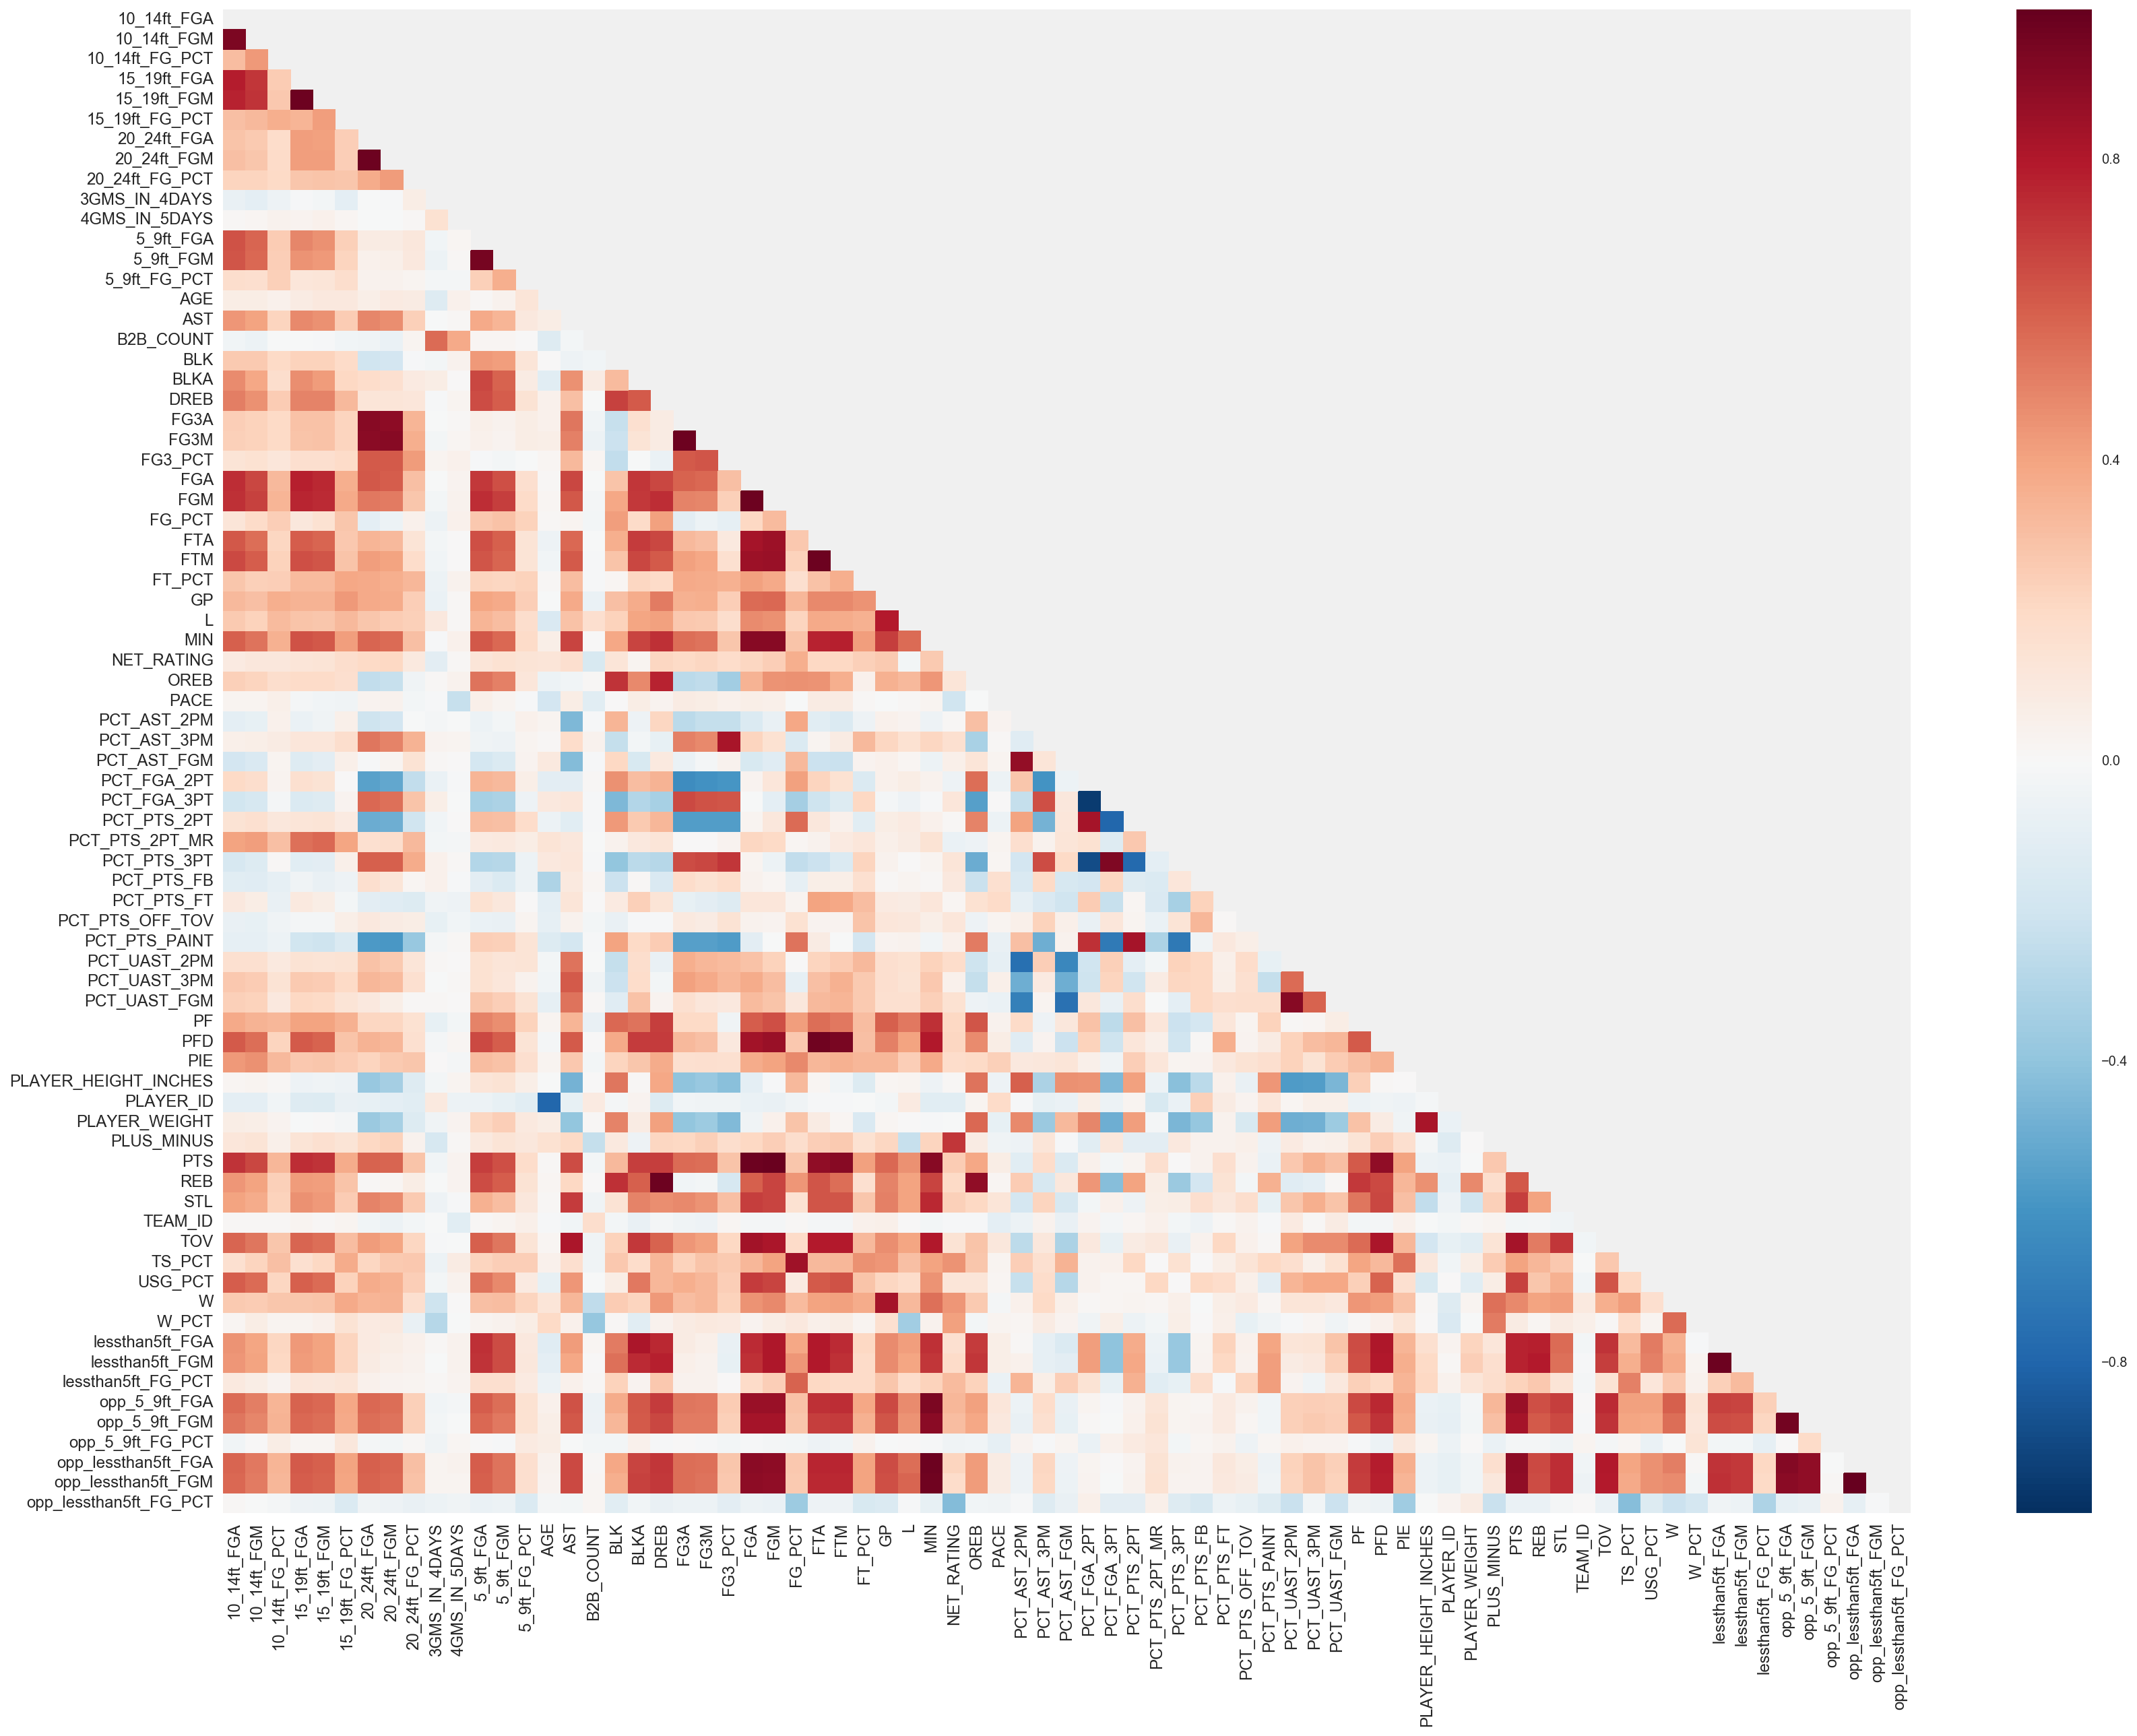

In [40]:
df = df_15[columns]
all_corr = df.corr()

# Set the default matplotlib figure size to 7x7:
plt.rcParams['figure.figsize']=(25,20)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(all_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(all_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [56]:
# subsetting players according to team 
def top_players(df, num_of_players=10, column='MIN'):
    return df.sort_values(by=column, ascending=False)[:num_of_players]

group = df.groupby(['SEASON', 'TEAM_ABBREVIATION']).apply(top_players)
group2 = df_15.groupby('TEAM_ABBREVIATION').apply(top_players)

subset = group[numeric_col].reset_index()
subset_15 = group2[numeric_col].reset_index()

print group.shape, subset.shape
print group2.shape, subset_15.shape

(5330, 102) (5330, 76)
(300, 101) (300, 75)


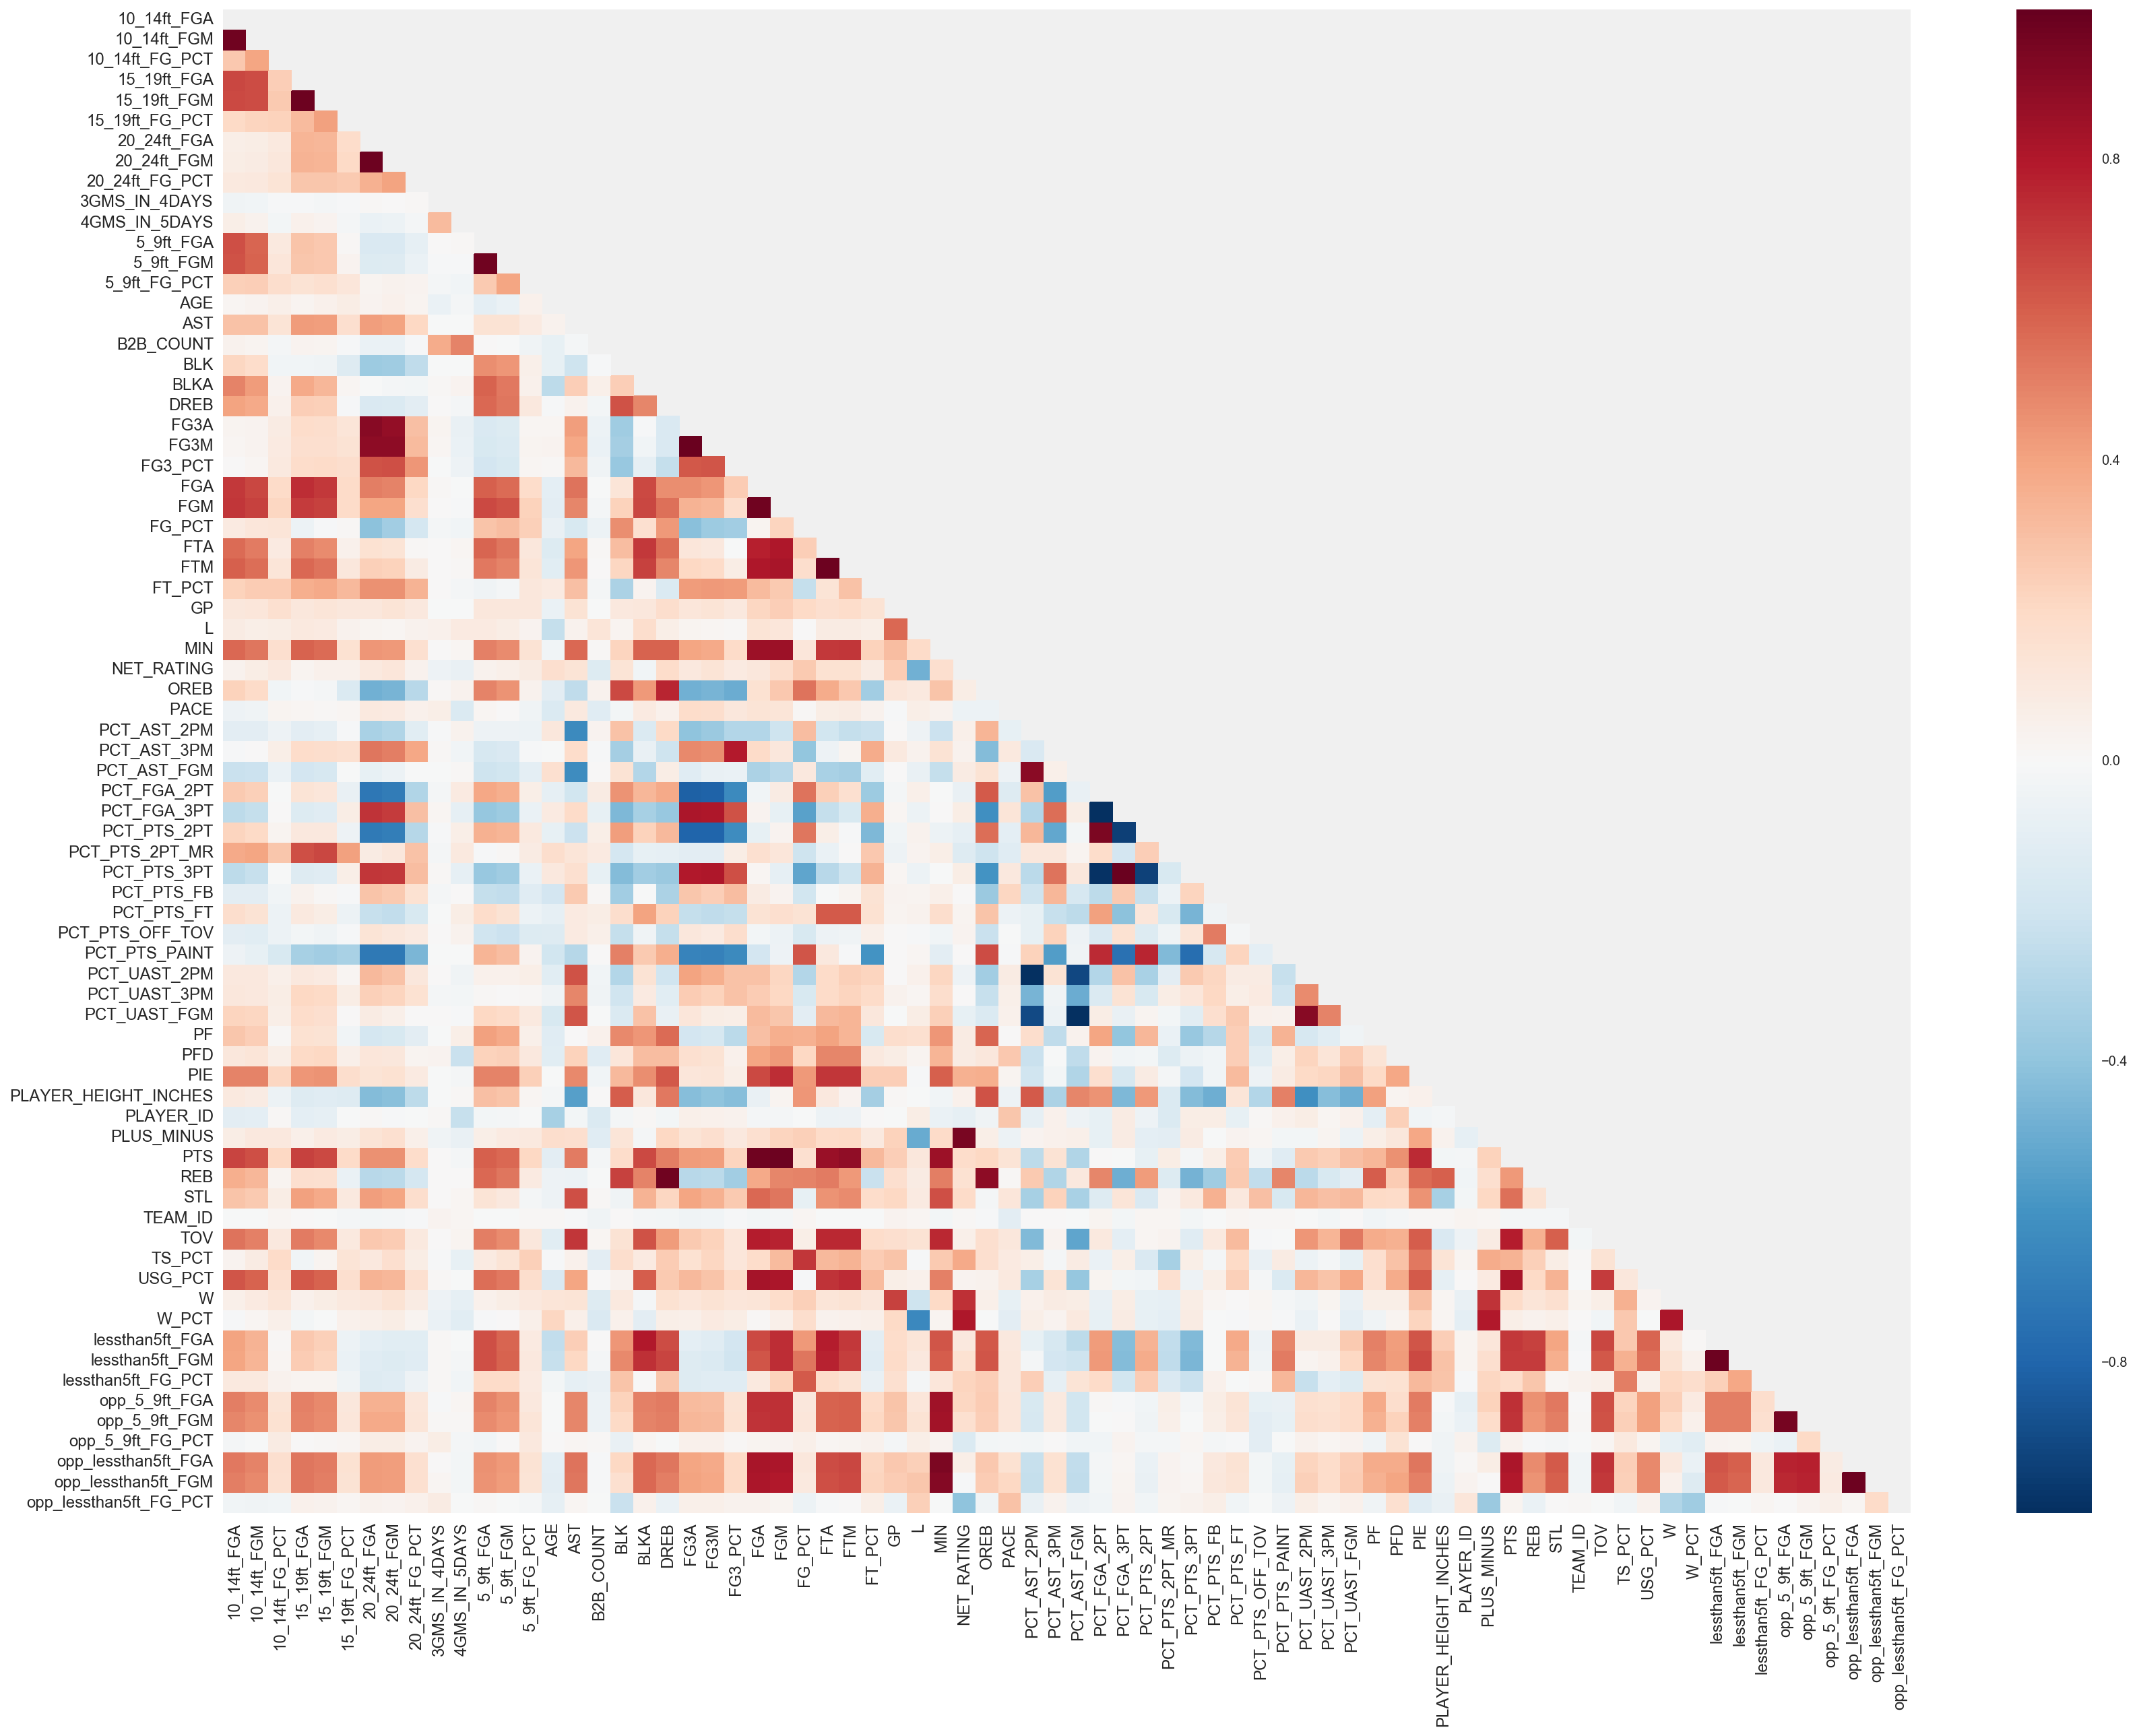

In [59]:
df = group[columns]
all_corr = df.corr()

# Set the default matplotlib figure size to 7x7:
plt.rcParams['figure.figsize']=(25,20)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(all_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(all_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()